<br></br>
# **Word Cloud - 말뭉치 응용**

## **1 Word Cloud**

In [3]:
# ! pip install wordcloud

In [4]:
with open('./data/Berlin.txt', 'r', encoding='utf-8') as f:
    texts = f.read()
texts[:100]

'존경하는 독일 국민 여러분,\n\n고국에 계신 국민 여러분,\n\n하울젠 쾨르버재단 이사님과 모드로 전 동독 총리님을 비롯한 내외 귀빈 여러분,\n\n\n먼저, 냉전과 분단을 넘어 통일을 이루'

In [5]:
# ! pip install matplotlib

(-0.5, 399.5, 199.5, -0.5)

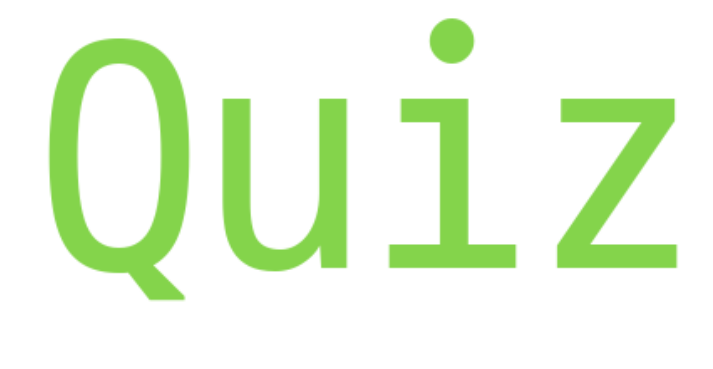

In [6]:
%matplotlib inline
from wordcloud import WordCloud
wcloud = WordCloud('./data/D2Coding.ttf', 
                   relative_scaling = 0.1, 
                   background_color='white').generate("=Quiz!=")

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")

In [7]:
# Token 빈도결과값
from nltk import FreqDist
from nltk.tokenize import word_tokenize
import pandas as pd
freqtxt = pd.Series(dict(FreqDist(word_tokenize(texts)))).sort_values(ascending=False)
freqtxt[:10]

.       168
,        67
것입니다     28
한반도      20
함께       18
있습니다     16
합니다      16
수        15
위한       13
북한의      12
dtype: int64

<br></br>
## **2 특정 형태소만 추출**
개념적 구분가능한 명사만 추출

In [8]:
from konlpy.tag import Twitter
twitter = Twitter()
tokens  = twitter.pos('인간중심경영을 아름답게 실천합니다', stem=True)
tokens

[('인간', 'Noun'),
 ('중심', 'Noun'),
 ('경영', 'Noun'),
 ('을', 'Josa'),
 ('아름답다', 'Adjective'),
 ('실천', 'Noun'),
 ('하다', 'Verb')]

In [9]:
# Twitter() 거친 후 명사만 추출하기
result = []
for token in tokens:
    if token[1] == "=Quiz!=":
        result.append(token[0])
result

[]

In [10]:
" ".join(result)

''

<br></br>
## **3 명사만 추출하여 Wordcloud 만들기**
tokens_noun = [token[0] &nbsp;&nbsp; for token in tokens &nbsp;&nbsp; if token[1] == 'Noun']

In [12]:
from konlpy.tag import Twitter
twitter = Twitter()
tokens  = twitter.pos(texts)
tokens[:5]

[('존경하는', 'Verb'),
 ('독일', 'Noun'),
 ('국민', 'Noun'),
 ('여러분', 'Noun'),
 (',', 'Punctuation')]

In [11]:
# 원본 Text 내용 살펴보기
texts[:300]

'존경하는 독일 국민 여러분,\n\n고국에 계신 국민 여러분,\n\n하울젠 쾨르버재단 이사님과 모드로 전 동독 총리님을 비롯한 내외 귀빈 여러분,\n\n\n먼저, 냉전과 분단을 넘어 통일을 이루'

In [13]:
tokens_noun = [token[0]   for token in tokens  
                          if token[1] == "=Quiz!="]
texts_noun  = " ".join(tokens_noun)
texts_noun[:300]

''

(-0.5, 399.5, 199.5, -0.5)

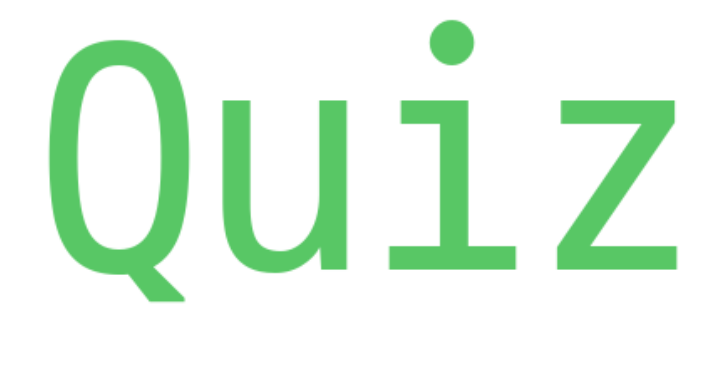

In [14]:
%matplotlib inline
from wordcloud import WordCloud
wcloud = WordCloud('./data/D2Coding.ttf',
                   relative_scaling = 0.1,
                   background_color = "white").generate("=Quiz!=")

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")